# EE 538: Low-Noise Analog Circuit Design
## Spring 2021
## Instructor: Jason Silver

## Announcements

 - Jason's office hours moved to Saturdays at 11am
 - Assignment 4 due Sunday, May 2 at midnight
 - Assignment 5 will be posted Saturday, May 1
 - Midterm exam will be posted Saturday, May 1
     - Online format administered as a quiz on Canvas

## Week 5

 - Motchenbacher Chapter 5
 - Art of Electronics Chapter 8

## Overview

 - Last time...
     - FET large/small-signal operation
     - Thermal noise in FET devices
     - 1/f noise and gate current noise
     - FET noise model 
     - FET vs BJT
 - Today...
     - Noise in common-emitter stages
     - Active load and current mirror noise
     - Cascode and parallel stages
     - Differential amplifier noise

## Python packages/modules

In [38]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker, cm
import numpy as np
from scipy import signal
from scipy import integrate
#%matplotlib notebook

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_2xy(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.plot(x, y1, 'b', label=y1label)
    ax.plot(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )     

def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)    
    
def plot_log3xy(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.semilogx(x, y1, 'b', label=y1label)
    ax.semilogx(x, y2, 'r', label=y2label)
    ax.semilogx(x, y3, 'g', label=y3label)  
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_log2xy(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.semilogx(x, y1, 'b', label=y1label)
    ax.semilogx(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    
def plot_loglog2(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.loglog(x, y1, 'b', label=y1label)
    ax.loglog(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

def plot_NF_vs_Rs(en_vals, in_vals, Rs_min, Rs_max, T_in_K):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    F1 = 1 + (en_vals[0]**2+Rs**2*in_vals[0]**2)/(4*k*T_in_K*Rs)
    F2 = 1 + (en_vals[1]**2+Rs**2*in_vals[1]**2)/(4*k*T_in_K*Rs)
    F3 = 1 + (en_vals[2]**2+Rs**2*in_vals[2]**2)/(4*k*T_in_K*Rs)
    ax.semilogx(Rs, 10*np.log10(F1), 'b', label=r'$e_{n1}$, $i_{n1}$')
    ax.semilogx(Rs, 10*np.log10(F2), 'r', label=r'$e_{n2}$, $i_{n2}$')
    ax.semilogx(Rs, 10*np.log10(F3), 'g', label=r'$e_{n3}$, $i_{n3}$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Noise Figure $NF$ [$dB$]')  
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_noise_curve(e_n, i_n, Rs_min, Rs_max):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    e_ni_2 = 4*k*T*Rs + e_n**2 + i_n**2*Rs**2
    ax.loglog(Rs, np.sqrt(e_ni_2), 'b', label='Total Noise')
    ax.loglog(Rs, np.sqrt(4*k*T*Rs), 'r', label=r'$\sqrt{4kTR_s}$')
    ax.loglog(Rs, e_n*np.ones(np.size(Rs)), 'g', label=r'$e_n$')
    ax.loglog(Rs, i_n*Rs, 'y', label=r'$i_n R_s$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Equivalent Input Noise [$V/\sqrt{Hz}$]')
    
    ax.legend()
    ax.legend(loc='upper center', ncol=4, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )   
    
def plot_bjt_NF(beta, r_bb, Rmin, Rmax, Imin, Imax):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    T = 300
    q = 1.602e-19
    V_T = k*T/q
    rs = np.logspace(np.log10(Rmin), np.log10(Rmax), num = 100)
    ic = np.logspace(np.log10(Imin), np.log10(Imax), num = 100)
    I_C, R_S = np.meshgrid(ic, rs)
    e_n_2 = 4*k*T*(V_T/2/I_C + r_bb)
    i_n_2 = 2*q*I_C/beta_0
    NF = 1 + (e_n_2 + i_n_2*R_S**2)/(4*k*T*R_S)
    cp = ax.contourf(I_C, R_S, 10*np.log10(NF), levels=np.linspace(0,15, num=16))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'Source Resistance $R_s$ [$\Omega$]')
    plt.xlabel(r'Collector Current $I_C$ [A]')
    fig.colorbar(cp)

In [4]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

# Lecture 5 - Low-Noise Amplifier Design

## Common-emitter stage noise

 - Considering only the shot noise from the input device (which is often the dominant source), the output current noise of a common-emitter stage is
 
\begin{equation}
i_{nc}^2 = 2qI_C = 2kTg_m
\end{equation}

 - As discussed previously, this can be considered to be the thermal noise of a resistance with a value of $2r_e = 2/g_m$
 
 - This constitutes the minimum noise achievable with a gain stage, assuming zero source and base resistances 

## Gain of a CE stage

 - The voltage gain of a resistively-loaded common-emitter stage is limited by the supply voltage
 
 - Assuming $r_o \gg R_C$, the gain is given by
 
\begin{equation}
|A_v| = g_m\cdot R_C = \dfrac{I_C}{V_T}\cdot R_C
\end{equation}

 - If the output is biased at $V_{CC}/2$, the gain can be expressed as
 
\begin{equation}
|A_v| = \dfrac{I_C}{V_T}\cdot R_C = \dfrac{I_C}{V_T}\cdot \dfrac{V_{CC}}{2I_C} = \dfrac{V_{CC}}{2V_T}
\end{equation} 

 - If $V_{CC} = 5V$ (for example), the maximum gain at room temperature is approximately $100V/V$ (slightly higher if the bias point is set lower than $V_{CC}/2$)


## Source/emitter degeneration

<center><img src="img/CE_degeneration.png" width=450 /></center>

 - Source/emitter degeneration provides several benefits: 
 
     1) reduction of bias sensitivity to temperature, process, and voltage and 
     
     2) gain linearization characteristic when $g_m R_E \gg 1$
 
 - The cost is a reduction in voltage gain, which can attributed to a reduced effective transconductance, $i_c/v_b$
 
 - The input-referred voltage noise of a single stage remains the same, but sensitivity to the noise of subsequent stages is increased relative to a CE stage without degeneration

<center><img src="img/degeneration_feedback.png" width=800 /></center>

 - The passage of $i_c$ through $R_E$ causes a reduction in the base-emitter voltage $v_{be}$, reducing the sensitivity of $i_c$ to $v_b$
 
 - The collector current is thus
 
\begin{equation}
i_c = g_m v_{be} = g_m(v_b - i_c R_E) \rightarrow i_c = \dfrac{g_m}{1+g_mR_E}\cdot v_b
\end{equation}
 
 - The effective transconductance, $i_c/v_b$ can be expressed as
 
\begin{equation}
G_m = \dfrac{i_c}{v_b} = \dfrac{g_m}{1+g_mR_E}
\end{equation}

 - If $g_mR_E \gg 1$, $G_m \approx 1/R_E$

## CE with active load

<center><img src="img/CE_active_load.png" width=375 /></center>

 - Primarily used in integrated circuit implementations, "active" load increases the maximum gain
 
 - In this case, the load resistance is the parallel combination of the small-signal output resistances of $Q_1$ and $Q_2$
 
 - The gain can be expressed as
 
\begin{equation}
|A_v| = \left|\dfrac{v_o}{v_i}\right| = g_{m1}\cdot r_{o1}||r_{o2} 
\end{equation}

 - Assuming $V_{A1} = V_{A2} = V_A$, this becomes
 
\begin{equation}
|A_v| = \left|\dfrac{v_o}{v_i}\right| = g_{m1}\cdot \dfrac{r_o}{2} = \dfrac{I_C}{V_T}\cdot\dfrac{V_A}{2I_C} =\dfrac{V_A}{2V_T}
\end{equation}

 - If $V_A = 100V$, this is an order of magnitude greater than the gain of a resistively-loaded amplifier!

## Active load noise

<center><img src="img/CE_active_load_noise.png" width=450 /></center>

 - The output current noise from $Q_2$ is given by
 
\begin{equation}
i_{n2}^2 = 4KTr_{b2}\cdot g_{m2}^2 + 2qI_{C2}
\end{equation}

 - The total output current noise is thus
 
\begin{align}
i_{n,out}^2 &= 4KTr_{b2}\cdot g_{m2}^2 + 2qI_{C2} + 2qI_{C1} \\
&= 4KTr_{b2}\cdot g_{m2}^2 + 4qI_{C} 
\end{align} 

 - The equivalent input voltage noise is
 
\begin{equation}
e_{n}^2 = 4kTr_{b1} + \dfrac{4KTr_{b2}\cdot g_{m2}^2 + 4qI_{C}}{g_{m1}^2} 
\end{equation}  

 - $Q_2$ effectively doubles the input noise power of the amplifier

<center><img src="img/active_load_noise_model.png" width=1100 /></center>

 - To determine the total input-referred voltage noise, first determine the short-circuit output current
 
 - The short-circuit current is the "unloaded" output current, analogous to the open-circuit output voltage
 
 - $i_{n,out}$ is referred to the input by dividing by the input transconductance $g_{m1}$

## Current mirrors

<center><img src="img/BJT_current_mirror.png" width=500 /></center>

 - Generally used in integrated circuits due to superior device matching, current mirrors are used to provide voltage biasing for current sources through a *translinear* function
 
 - Ignoring base current, $Q_1$ converts $I_{BIAS}$ into a voltage $V_{BE1}$ through the relation
 
\begin{equation}
V_{BE1} = V_T \ln\dfrac{I_{BIAS}}{I_{S1}}
\end{equation}

 - Assuming matched devices ($I_{S1} = I_{S2} = I_S$), the output current is given by
 
\begin{equation}
I_{OUT} = I_S\exp\left(\dfrac{V_{BE1}}{V_T}\right) = I_{BIAS}
\end{equation}

## Current mirror noise

<center><img src="img/current_mirror_noise.png" width=500 /></center>

 - Considering only shot noise from $Q_1$ and $Q_2$ (and still ignoring base current for simplicity), the output current noise can be determined through superposition
 
 - First, we can refer $i_{nc1}$ to the base node by dividing by $g_{m2}$
 
\begin{equation}
e_{n2}^2 = \dfrac{2qI_{BIAS}}{g_{m2}^2}
\end{equation}

 - The output current noise is the mean-square sum of $i_{nc2}$ and $g_{m1}e_{n2}$ (assume $g_{m1} = g_{m2}$):
 
\begin{align}
i_{n,out}^2 &= 2qI_{OUT} + g_{m1}^2e_{n2}^2\\
&= \boxed{4qI_{OUT}}
\end{align}

 - What if the emitter areas of $Q_1$ and $Q_2$ are ratioed such that $I_{OUT} = KI_{BIAS}$?
 
 - In this case, $g_{m2} = Kg_{m1}$, and $Q_2$'s voltage noise is $2qI_{BIAS}/g_{m2}^2 = K\cdot 2qI_{OUT}/g_{m1}^2$
 
 - The output current noise due to $Q_1$ is therefore $K\cdot 2qI_{OUT}$ and the total noise is given by
 
\begin{equation}
i_{n,out}^2 = (K+1)\cdot 2qI_{OUT}
\end{equation}

 - Thus, $Q_1$'s collector shot noise sees the gain of the current mirror, $\sqrt{K+1}$, and we see a tradeoff between noise and power when biasing a current mirror
 
 - An RC filter may be added between the base nodes of $Q_1$ and $Q_2$ to limit $Q_1$'s noise bandwidth 

## Current source degeneration

<center><img src="img/current_source_noise.png" width=500 /></center>

 - In the active CE amp, $Q_2$ functioned as a current source/active load to increase gain, but at the expense of an increase of (at least) $3dB$ in the input-referred voltage noise of the amplifier
 
 - As discussed previously, current source noise can be reduced by degeneration, i.e. the addition of a resistor $R_E$ between the emitter of $Q_2$ and $V_{CC}$
 
 - The inclusion of $R_E$ serves to "degenerate" $Q_2$'s transconductance and, as a result, its noise
 
 - This comes at the expense of noise due to $R_E$ and reduced voltage headroom
 
 - Is there an optimal value of $R_E$ from a noise perspective?

 - First, let's asses the noise due only to $Q_2$. Ignoring noise due to $r_b$, $Q_2$'s noise source, $i_{n2}$, is given by
 
\begin{equation}
i_{n2}^2 = 2qI_C 
\end{equation}

 - KCL at $Q_2$'s emitter ($v_{e2}$) is (assuming $i_{n2}$ flows away from $v_{e2}$)
 
\begin{equation}
i_{n2} + g_{m2}v_{e2} + v_{e2}/R_E = 0
\end{equation}

 - The sum of the noise current through $R_E$ (from only $Q_2$) determines the noise voltage $v_{e2}$
 
\begin{equation}
v_{e2} = (-i_{n2} - g_{m2}v_{e2})\cdot R_E \rightarrow v_{e2} = -i_{n2}R_E/(1+g_{m2}R_E)
\end{equation}

 - The total output noise due to $Q_2$ is thus
 
\begin{equation}
i_{n2,out} = i_{n2} - \dfrac{g_{m2}i_{n2}R_E}{1+g_{m2}R_E} = \boxed{\dfrac{i_{n2}}{1+g_{m2}R_E} \approx \dfrac{\sqrt{2kT/r_{e2}}}{1+g_{m2}R_E}}
\end{equation}

 - In other words, $R_E$ reduces the output noise due to $Q_2$ by a factor $1+g_{m2}R_E$

 - The output current noise due to $R_E$ is given by
 
\begin{equation}
i_{nR_E,out} = i_{nR_E} \cdot \dfrac{R_E}{1/g_{m2} + R_E} = i_{nR_E}\cdot \dfrac{g_{m2}R_E}{1 + g_{m2}R_E} = \sqrt{\dfrac{4kT}{R_E}}\cdot \dfrac{g_{m2}R_E}{1 + g_{m2}R_E}
\end{equation}

 - Assuming $g_{m2}R_E \gg 1$ (a measure of the amount of degeneration), the majority of $R_E$'s noise (which is equal to $4kT/R_E$) flows through the output
 
 - The total output noise of the current source is thus
 
\begin{align}
i_n^2 &= \dfrac{2kT/r_e}{(1+g_{m2}R_E)^2} + \dfrac{4kT}{R_E}\cdot \left(\dfrac{g_{m2}R_E}{1 + g_{m2}R_E}\right)^2 \\
\\
&=\dfrac{2kT/r_e}{(1+g_{m2}R_E)^2} + \dfrac{4kT}{r_e}\cdot \dfrac{g_{m2}R_E}{(1 + g_{m2}R_E)^2} = \dfrac{2kT}{r_e}\cdot\dfrac{1 + 2g_{m2}R_E}{(1 + g_{m2}R_E)^2} 
\end{align}
 
 - As $g_m R_E$ becomes $\gg 1$, the output noise approaches
 
\begin{align}
\lim_{g_m R_E \to \infty} i_n^2 = \dfrac{2kT}{r_e}\cdot\dfrac{2}{g_{m2}R_E}  = \dfrac{4kT}{R_E} 
\end{align}

 - The appropriate value of $R_E$ can be expressed in terms of the voltage drop across it (let's call this $V_{RE}$)
 
 - The gain factor $g_{m2}R_E$ can be expressed as
 
\begin{equation}
g_{m2}R_E = \dfrac{I_C}{V_T}\dfrac{V_{RE}}{I_C} = \dfrac{V_{RE}}{V_T}
\end{equation}

 - For $g_{m2}R_E>> 1$ the RMS current noise is reduced by the factor $\sqrt{V_{RE}/2V_T}$ 
 
 - We need the DC voltage drop across $R_E$ to equal approximately $4V_T$ (~$100mV$ at room temperature) to reduce the total noise by $3dB$
 


## Miller effect

<center><img src="img/CE_Miller_effect.png" width=550 /></center>

 - As discussed previously in the context of high-frequency current noise, the Miller effect occurs due to the presence of a feedback capacitance between the input and output of voltage gain stage
 
 - The Miller effect reduces the *effective* impedance (to ground) of $C_\mu$, from the perspective of the input, by a factor $1+A_v$, where $A_v$ is the voltage gain $v_o/v_i$
 
 - The reduction in impedance of $C_\mu$ constitutes an increase in the effective capacitance looking into the input given by $(1+A_v)C_\mu$
 
 - The resulting pole at $1/R_s(1+A_v)C_\mu$ can be a bandwidth limitation for high-frequency (e.g. RF) applications

## Adding a cascode

<center><img src="img/CE_cascode.png" width=500 /></center>

 - The addition of a common-base stage ($Q_2$) between  the collector of $Q_1$ and $v_o$ serves to "shield" $C_\mu$ from the high-impedance output node, thereby alleviating the consequences of the Miller effect
 
 - Assuming $r_o \gg 1/g_{m2}, R_C$, the impedance looking into the emitter of $Q_2$ is *approximately*
 
\begin{equation}
R_{up} \approx \dfrac{1}{g_{m2}}
\end{equation}

 - The effective gain between $v_i$ and $v_{c1}$ is thus
 
\begin{equation}
\left|\dfrac{v_{c1}}{v_i}\right| \approx \dfrac{g_{m1}}{g_{m2}} = 1
\end{equation}

- This results in only a small increase $~2$ in the effective input capacitance due to $C_\mu$, and an increase in the bandwidth of the common-emitter stage

## Cascode noise

<center><img src="img/cascode_noise.png" width=375 /></center>

 - The noise due to the cascode device $Q_2$ can be evaluated using the concept of degeneration previously discussed
 
 - The output noise current due to $Q_2$ is given by
 
\begin{equation}
i_{n2,out}^2 = \dfrac{2qI_C + 4kTr_{b2}\cdot g_{m2}^2}{(1+g_{m2}r_{o1})^2}
\end{equation}

 - Recall that the intrinsic gain of a BJT transistor is a (temperature-dependent) quantity given by $g_mr_o = V_A/V_T$

 - Assuming that for any reasonable transistor $g_m r_o \gg 1$, the noise due to $Q_2$ is effectively eliminated by the output impedance of $Q_1$
 
 - Again assuming $g_m r_o\gg 1$, the noise due to $Q_1$ is largely unaffected by the presence of $Q_2$

## Parallel input devices

<center><img src="img/parallel_input_pair.png" width=600 /></center>

 - Using parallel input devices can improve the noise performance of an amplifier
 
 - Assuming $I_{C1} = I_{C2} = I_C$ and identical devices, the output current noise can be expressed as 
 
\begin{equation}
i_{n,out}^2 = 4qI_C + 8kT\cdot r_b \cdot g_m^2
\end{equation}

 - The input-referred voltage noise is determined by dividing by the *effective* transconductance $G_m = 2I_C/V_T = 2\cdot g_m$

\begin{equation}
e_n^2 =  \dfrac{4qI_C + 8kT\cdot r_b\cdot g_m^2}{4\cdot g_m^2} = \dfrac{qI_C}{g_m^2} + 2kT r_b
\end{equation}
 
 - Compared to the input-referred voltage noise of a single BJT with collector current $I_C$, this constitutes a $\sqrt{2}$ reduction 
 
 - The input noise current is increased by a factor of $\sqrt{2}$

## Differential amplifier

<center><img src="img/diffamp_CE.png" width=600 /></center>

 - A differential pair, comprising a common-emitter (or common-source) forms the core of any operational amplifier
 - Differential amplifiers can be driven with complementary inputs, or one input can be held fixed 
 
 - One major advantage of the differential amplifier is its tolerance to the common-mode input voltage, including DC inputs
 
 - The DC current (which is common-mode) is degenerated by $R_{EE}$, while the small-signal *differential* current is unaffected by $R_{EE}$
 
 - This makes it possible to use the the differential amplifier as a single-ended DC-coupled amplifier by connecting one of the inputs to a constant voltage

## Large-signal characteristic

<center><img src="img/differential_pair_current_source.png" width=550 /></center>

 - Using a current source instead of a resistor for biasing improves the common-mode rejection of the differential amplifier
 
 - Assuming $R_{TAIL}\to\infty$ the base-emitter voltages are given by
 
\begin{equation}
V_{be1} = V_T\ln\dfrac{I_{c1}}{I_{S1}} \;\;\;\;V_{be2} = V_T\ln\dfrac{I_{c2}}{I_{S2}}
\end{equation}

 - Assuming identical transistors ($I_{S1} = I_{S2}$) gives

\begin{equation}
\dfrac{I_{c1}}{I_{c2}} = \exp\left(\dfrac{V_{ip} - V_{im}}{V_T}\right) =\exp\left(\dfrac{V_{id}}{V_T}\right) 
\end{equation}

 - Defining the emitter current gain $\alpha$ as
 
\begin{equation}
\alpha = \dfrac{I_C}{I_E} = \dfrac{\beta}{1+\beta}
\end{equation}

 - We can express $I_{c1}$ and $I_{c2}$ as
 
\begin{equation}
I_{c1} = \dfrac{\alpha I_{TAIL}}{1+\exp\left(-\dfrac{V_{id}}{V_T}\right)} \;\;\;\; I_{c2} = \dfrac{\alpha I_{TAIL}}{1+\exp\left(\dfrac{V_{id}}{V_T}\right)}
\end{equation}

 - The differential output voltage is a *hyperbolic tangent* function of the input voltage
 
\begin{equation}
V_{od} = V_{op} - V_{om} = \alpha I_{TAIL}R_C\tanh\left(\dfrac{-V_{id}}{2V_T}\right)
\end{equation}

 - The collector currents reach their min/max values for $V_{id} \approx 3V_T$

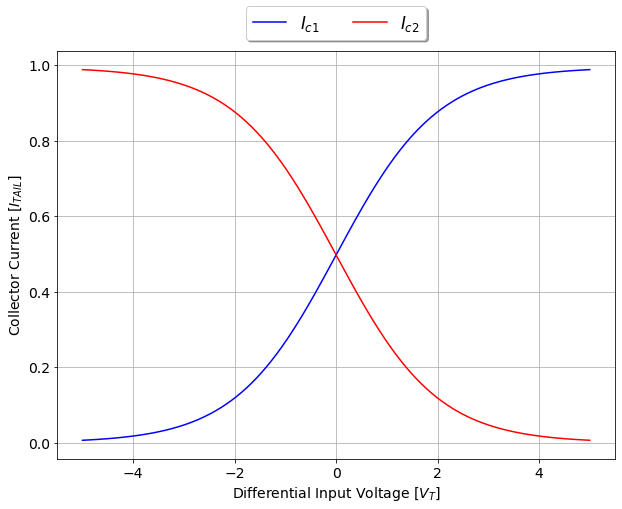

In [45]:
beta = 200
alpha = beta/(beta+1)
I_TAIL = 1e-3
V_id = np.linspace(-5*k*T/q, 5*k*T/q, 100)
I_c1 = alpha*I_TAIL/(1+np.exp(-V_id/(k*T/q)))
I_c2 = alpha*I_TAIL/(1+np.exp(V_id/(k*T/q)))
plot_2xy(V_id/(k*T/q), I_c1/I_TAIL, I_c2/I_TAIL, 
         r'Differential Input Voltage [$V_T$]', r'Collector Current [$I_{TAIL}$]',
        r'$I_{c1}$', r'$I_{c2}$')

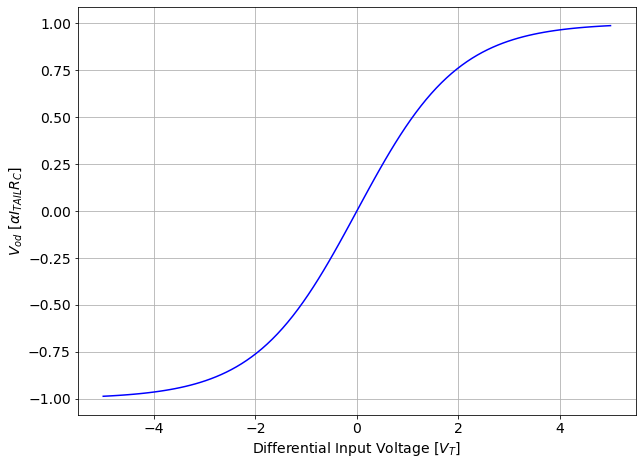

In [53]:
V_CC = 5
R_C = 1e3
V_om = V_CC - I_c1*R_C
V_op = V_CC - I_c2*R_C
plot_xy(V_id/(k*T/q), (V_op - V_om)/alpha/I_TAIL/R_C,  
        r'Differential Input Voltage [$V_T$]', r'$V_{od}$ [$\alpha I_{TAIL} R_C$]')

## Differential gain

<center><img src="img/diffamp_CE.png" width=600 /></center>

 - Analysis of the differential amplifier is simplified by the assumption that $v_{ip}$ and $v_{im}$ are complementary and $V_{id} \ll 3V_T$
 
 - Assuming this is the case, the small-signal current through $R_{EE}$ consists of complementary currents, making the net change in $V_P$ zero
 
 - In this sense, $V_P$ is treated as a small-signal ground, enabling straightforward analysis of the differential half-circuit
 
 - Large input signals (greater than $3V_T$) violate the *small-signal assumption* and cause significant movement of $V_P$

<center><img src="img/differential_half_circuit.png" width=500 /></center>

 - As with the single-ended common-emitter amplifier, the small-signal gain is given by
 
\begin{equation}
|A_v| = \dfrac{g_m}{1+g_mR_E}\cdot R_C
\end{equation}

 - If $g_m R_C \gg 1$, this is approximated as $R_C/R_E$
 
 - If $R_E = 0$, we see the full gain of the common-emitter amplifier, $g_m R_C$
 
 - Assuming $v_{ip} = -v_{im} = v_{id}/2$, the differential gain is given by
 
\begin{align}
A_{vd} &= \dfrac{v_{op} - v_{om}}{v_{ip} - v_{im}}\\
&= \dfrac{\frac{1}{2}g_{m}R_C-(-\frac{1}{2}g_{m}R_C)}{v_{id}}\cdot v_{id}\\
&= \boxed{g_mR_C}
\end{align}



## Common-mode gain

<center><img src="img/diffamp_common_mode.png" width=500 /></center>

 - The common-mode gain is a measure of the differential amplifier's ability to reject common-mode (including DC) inputs
 
 - Common-mode inputs and outputs are, by definition, equal to each other, allowing us to treat them as virtual shorts
 
 - Due to the absence of a virtual ground the common-mode gain is reduced by dengeration
 
 - Assuming $2g_m R_{EE} \gg 1$, we have
 
\begin{equation}
\dfrac{v_{ocm}}{v_{icm}} \approx \dfrac{R_C}{R_E + 2R_{EE}} 
\end{equation}

 - For current-source-biased designs, $R_{EE}$ is the output impedance of a transistor (or cascode current source)

## Single-ended input

<center><img src="img/diffamp_se.png" width=600 /></center>

 - A differential amplifier can be used for single-ended applications where DC-coupling is desired/needed
 
 - In this case, the small-signal current of $Q_1$ flows through the emitter of $Q_2$
 
 - Assuming $1/g_{m2} \ll R_{EE}$, $g_{m1} = g_{m2}$, and $R_s = 0$  the small-signal current of $Q_1$ is given by 
 
\begin{equation}
i_{c1} = \dfrac{g_{m1}v_i}{2}
\end{equation} 

 - The small-signal output voltage is thus
 
\begin{equation}
v_o = \dfrac{g_{m1}R_C}{2}
\end{equation}

## Noise analysis

 - The noise analysis of the differential amplifier can't employ the differential half-circuit, since the noise does not constitute a differential excitation
 
 - The single-ended output current noise at the collector of $Q_1$ includes contributions from $Q_1$, $Q_2$, and $R_{C1}$ (but not $R_{C2}$, why?)
 
\begin{equation}
i_{n1,out}^2 = 4kTr_b\cdot (g_{m1}/2)^2 + 4kTr_b\cdot (g_{m2}/2)^2  + 2qI_{C1}/4 + 2qI_{C2}/4 +  4kT/R_{C1}
\end{equation}

 - The single-ended output noise voltage is the product of this noise current and $R_{C1}$, 

\begin{equation}
e_{n1,out} = i_{n1,out}\cdot R_{C1}
\end{equation}

 - Each input has a noise current due to shot noise given by
 
\begin{equation}
i_n = qI_{TAIL}/\beta
\end{equation}

## Noise summary

## Operational amplifier

<center><img src="img/bjt_opamp.png" width=900 /></center>

 - An opamp is essentially a differential pair with an active current-mirror load, typically followed by a low-impedance output stage (emitter-follower in this case)

## Summary

 - The common-emitter stage provides substantial gain, particularly with an active load, but DC-coupling is challenging due to the (exponential) sensitivity of bias conditions to the DC input voltage
 
 - An active load increases gain of the CE stage by an order of magnitude, but doubles the mean-square equivalent input voltage noise
 
 - Degeneration decreases the RMS shot noise from an active load by the ratio $\sqrt{V_{RE}/2V_T}$, where $V_{RE}$ is the voltage drop across the degeneration resistor
 
 - The Miller effect, which degrades high-frequency performance of high-gain stages like the CE amplifier, can be alleviated by cascoding
 
 - 